In [1]:
import sklearn.datasets as datasets
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.boost.anyboost as anyboost

In [2]:
X, Y = datasets.make_moons(200, noise=0.25)
Y = 2*Y-1
Y = Y.astype("d")

Xt, Yt = datasets.make_moons(200, noise=0.2)
Yt = 2*Yt-1
Yt = Yt.astype("d")

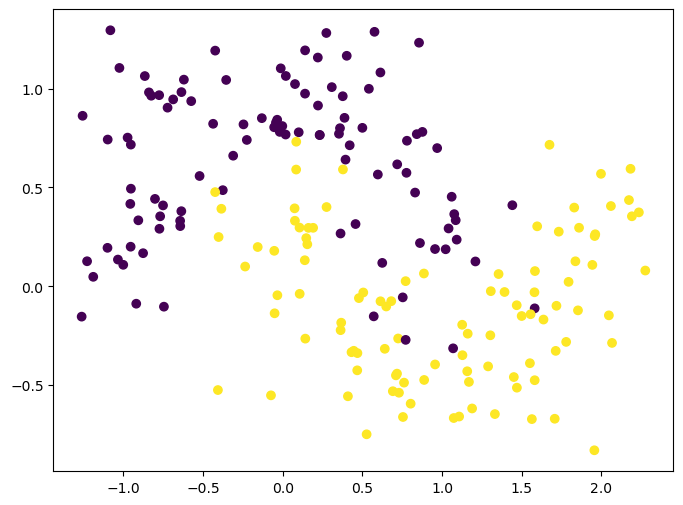

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [4]:
def sigmoidal_factory(n):
    return models.SigmaNeuronModel(funcs.Sigmoidal(20.0), n)

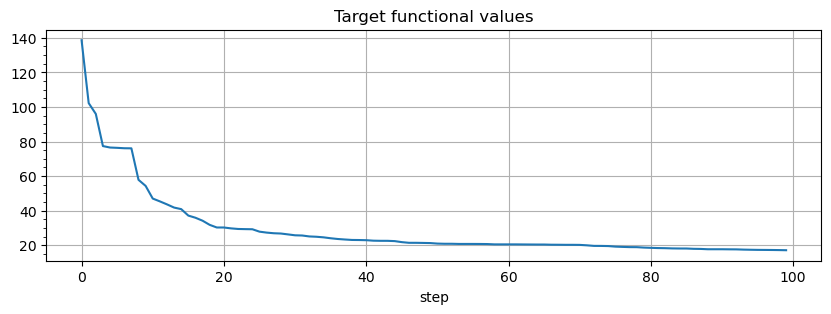

In [14]:
cls = anyboost.AnyBoostClassification(
    func=funcs.SoftHinge_Exp(), 
    model_factory=sigmoidal_factory, 
    # shrink=0.2,
    # min_weak_learn_score=0.01,
    n_classifier=100)
cls.fit(X, Y, regnorm=funcs2.SquareNorm(), tau=1.0)

plt.figure(figsize=(10,3))
plt.title("Target functional values")
plt.plot(cls.lvals)
plt.xlabel("step")
ax = plt.gca()
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.grid(1)
plt.show()

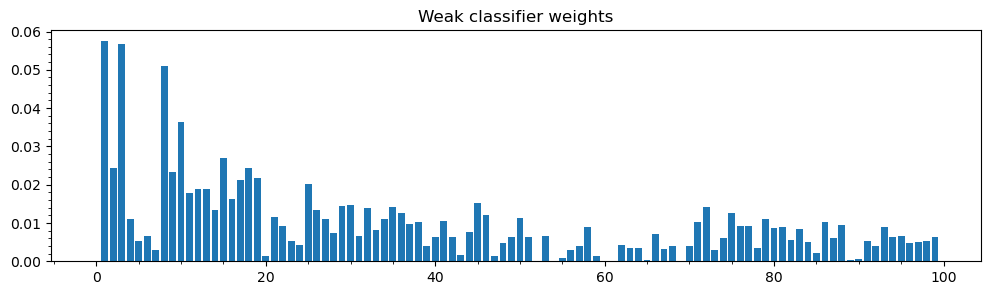

In [15]:
plt.figure(figsize=(12,3))
plt.title("Weak classifier weights")
plt.bar(range(len(cls.H.weights)), cls.H.weights)
plt.minorticks_on()
plt.show()

In [16]:
scores = np.array([metrics.accuracy_score(np.sign(mod.evaluate(X)),Y) for mod in cls.H.models])
# print((scores>0.5).sum(), (scores<0.5).sum())

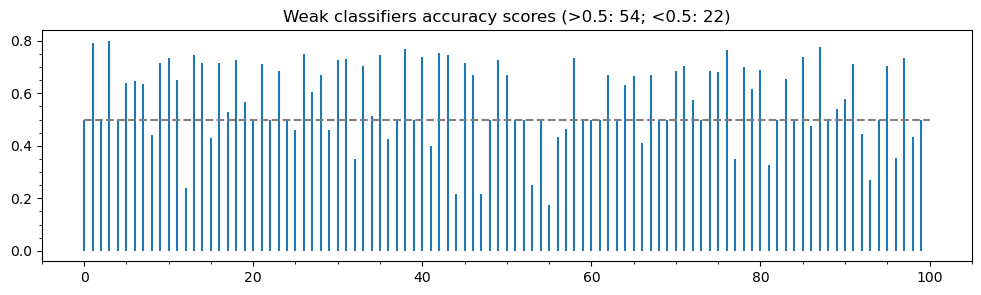

In [17]:
plt.figure(figsize=(12,3))
plt.title(f"Weak classifiers accuracy scores (>0.5: {(scores>0.5).sum()}; <0.5: {(scores<0.5).sum()})")
plt.vlines(range(len(scores)), 0, scores)
plt.hlines(0.5, 0, len(scores), colors='grey', linestyles='--')
plt.minorticks_on()
plt.show()

In [18]:
print("Classifier accuracy:", metrics.accuracy_score(np.sign(cls.H.evaluate(X)),Y))
print("Classifier accuracy:", metrics.accuracy_score(np.sign(cls.H.evaluate(Xt)),Yt))

Classifier accuracy: 0.96
Classifier accuracy: 0.935


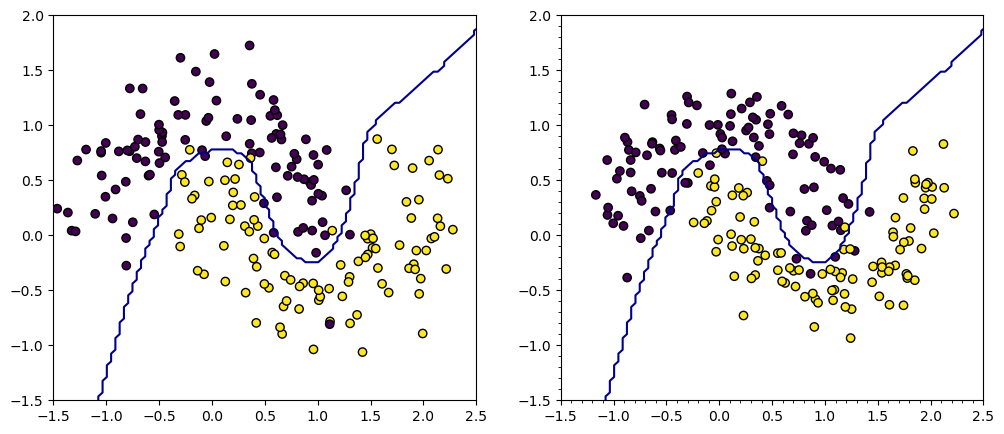

In [19]:
plt.figure(figsize=(12,5))
XX, YY = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1.5, 2.0, 100))
XY = np.c_[XX.ravel(), YY.ravel()]
plt.subplot(1,2,1)
ZZ = np.sign(cls.H.evaluate(XY))
ZZ = ZZ.reshape(XX.shape)
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
plt.contour(ZZ, extent=(-1.5, 2.5, -1.5,2.0), levels=[0], colors=["darkblue"])
plt.subplot(1,2,2)
ZZ2 = np.sign(cls.H.evaluate(XY))
ZZ2 = ZZ2.reshape(XX.shape)
plt.scatter(Xt[:,0], Xt[:,1], c=Yt, edgecolors='k')
plt.contour(ZZ2, extent=(-1.5, 2.5, -1.5,2.0), levels=[0], colors=["darkblue"])
plt.minorticks_on()
plt.show()

In [24]:
scores = []
scores_t = []
for i in range(22):
    X, Y = datasets.make_moons(200, noise=0.25)
    Y = 2*Y-1
    Y = Y.astype("d")
    
    Xt, Yt = datasets.make_moons(200, noise=0.25)
    Yt = 2*Yt-1
    Yt = Yt.astype("d")

    cls = anyboost.AnyBoostClassification(
        func=funcs.SoftHinge_Exp(), 
        model_factory=sigmoidal_factory, 
        # shrink=0.2,
        # min_weak_learn_score=0.01,
        n_classifier=100)
    cls.fit(X, Y, regnorm=funcs2.SquareNorm(), tau=1.0)
    scores.append(metrics.accuracy_score(np.sign(cls.H.evaluate(X)), Y))
    scores_t.append(metrics.accuracy_score(np.sign(cls.H.evaluate(Xt)), Yt))

print(np.mean(scores),   np.std(scores))
print(np.mean(scores_t), np.std(scores_t))

0.9479545454545456 0.016966483732580924
0.9359090909090909 0.016964961460474083
